In [ ]:
import pandas as pd
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.drive import GoogleDrive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"1lEpoRKczv5EvZhff9O2I-0JkdHnbe_Mq"})   # замените id на id своего файла
downloaded.GetContentFile('transactions.csv')
transactions = pd.read_csv('transactions.csv', delimiter=',', nrows = 1000000)
downloaded = drive.CreateFile({'id':"1EP3KrATWS1I_qYdpRhYnSDl-eoBiOBQc"})   # замените id на id своего файла
downloaded.GetContentFile('tr_types.csv')
tr_types = pd.read_csv('tr_types.csv', delimiter=';')
downloaded = drive.CreateFile({'id':"10J8RzMIhoYHiad49r-oWNMAk-V5lo3OE"})   # замените id на id своего файла
downloaded.GetContentFile('tr_mcc_codes.csv')
tr_mcc_codes = pd.read_csv('tr_mcc_codes.csv', delimiter=';')
downloaded = drive.CreateFile({'id':"1FG1fopcmvMZ7GBaBOqQipccSeFoMUvNT"})   # замените id на id своего файла
downloaded.GetContentFile('gender_train.csv')
gender_train = pd.read_csv('gender_train.csv', delimiter=',')

## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;

In [ ]:
print(tr_types.head(10))
print(tr_mcc_codes.head(10))
print(transactions.head(10))
print(gender_train.head(10))

   tr_type                                     tr_description
0     3200  Плата за предоставление услуг посредством моби...
1     3210  Плата за предоставление отчета по счету карты ...
2     3800  Плата за обслуживание банковской карты (за пер...
3     4000            Плата за получение наличных в Сбербанке
4     4001  Плата за получение наличных в Сбербанке (в дру...
5     4010        Плата за получение наличных в АТМ Сбербанка
6     4011  Плата за получение наличных в АТМ Сбербанка (в...
7     4020  Плата за получение наличных через POS в Сбербанке
8     4021  Плата за получение наличных через POS в Сберба...
9     4030  Плата за взнос наличных через АТМ (в своем тер...
   mcc_code                                    mcc_description
0       742                                Ветеринарные услуги
1      1711  Генеральные подрядчики по вентиляции, теплосна...
2      1731                        Подрядчики по электричеству
3      1799  Подрядчики, специализированная торговля — нигд...
4  


Задания 1-4 делаются без использования merge!

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'


In [ ]:
sample = transactions.sample(1000)
print(len(sample[sample['tr_type'].isin(tr_types[tr_types['tr_description'].str.contains('POS | АТМ')]['tr_type'])]) / len(sample))

0.59


## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [ ]:
frequency = transactions['tr_type'].value_counts().head(10)
dataframe2 = tr_types.set_index('tr_type').loc[frequency.index]
dataframe1 = frequency.to_frame().join(dataframe2)
dataframe1.rename({'tr_type': 'frequency'}, axis=1, inplace=True)
print(dataframe1)

      frequency                                     tr_description
1010     231117                              Покупка. POS ТУ СБ РФ
2010     151166              Выдача наличных в АТМ Сбербанк России
7070     149006  Перевод на карту (с карты) через Мобильный бан...
1110     137658                             Покупка. POS ТУ Россия
1030     118975                     Оплата услуги. Банкоматы СБ РФ
2370      49830  Списание с карты на карту по операции <перевод...
7010      28972       Взнос наличных через АТМ (в своем тер.банке)
7030      26078  Перевод на карту (с карты) через АТМ (в предел...
7071      15781  Перевод на карту (с карты) через Мобильный бан...
1100      15476                                Покупка. ТУ  Россия


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

                   amount
customer_id              
70780820     1.248115e+09
                   amount
customer_id              
70780820    -1.249952e+09
2498067091.600018


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


tr_day
55   -2778938.34
Name: amount, dtype: float64
tr_day
289    17891610.36
Name: amount, dtype: float64


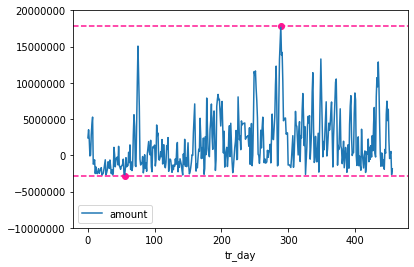

In [ ]:
max = transactions[transactions['amount'] > 0].groupby('customer_id')[['amount']].sum().sort_values(by=['amount']).tail(1)
min = transactions[transactions['amount'] < 0].groupby('customer_id')[['amount']].sum().sort_values(by=['amount']).head(1)
print(max)
print(min)
print(abs(max.iloc[0]['amount'] - min.iloc[0]['amount']))

import matplotlib.pyplot as plt

client1 = transactions[transactions['customer_id'] == max.index[0]]
client1['tr_day'] = client1.apply(lambda row: int(row['tr_datetime'].split(' ')[0]), axis=1)
client1 = client1.groupby('tr_day')[['amount']].sum()
start = 0
for index, row in client1.iterrows():
  start += row['amount']
  row['amount'] = start
min = client1['amount'].nsmallest(1)
max = client1['amount'].nlargest(1)
print(min)
print(max)
client1.plot()
plt.scatter(min.index[0], min, c = 'deeppink')
plt.scatter(max.index[0], max, c = 'deeppink')
plt.axhline(y=min.iloc[0], c = 'deeppink', linestyle='--')
plt.axhline(y=max.iloc[0], c = 'deeppink', linestyle='--')
plt.ylim(-1e7, 2e7)
plt.ticklabel_format(style = 'plain')
plt.show()

## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [ ]:
task2 = frequency.head(10)
for i in task2.index:
  print("{}: mean = {}, median = {}".format(i, transactions[transactions['tr_type'] == i]['amount'].mean(), transactions[transactions['tr_type'] == i]['amount'].median()))

task3 = transactions[transactions['customer_id'] == max.index[0]]
print("{}: mean = {}, median = {}".format(max.index[0], task3['amount'].mean(), task3['amount'].median()))

1010: mean = -19784.748639648507, median = -7411.52
2010: mean = -136077.62932505234, median = -44918.32
7070: mean = 65569.83170018934, median = 11319.42
1110: mean = -32119.330370770458, median = -11207.57
1030: mean = -5320.980221811316, median = -2245.92
2370: mean = -205418.24903167944, median = -44918.32
7010: mean = 276391.7895961331, median = 112295.79
7030: mean = 86104.33290896451, median = 13951.52
7071: mean = 66806.82662251407, median = 3593.47
1100: mean = -44061.82726156657, median = -10188.259999999998
70780820: mean = -20.694945765418275, median = 8803.99


## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [ ]:
print(abs(abs(transactions[(transactions['gender'] == 0) & (transactions['amount'] < 0)]['amount'].mean()) - abs(transactions[(transactions['gender'] == 1) & (transactions['amount'] < 0)]['amount'].mean())), 
      abs(abs(transactions[(transactions['gender'] == 0) & (transactions['amount'] > 0)]['amount'].mean()) - abs(transactions[(transactions['gender'] == 1) & (transactions['amount'] > 0)]['amount'].mean())))

32718.05492021877 63366.57104801515


## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [ ]:
max_income0 = transactions[(transactions['amount'] > 0) & (transactions['gender'] == 0)].groupby('tr_type')[['amount']].max()['amount'].nsmallest(10).to_frame()
max_income1 = transactions[(transactions['amount'] > 0) & (transactions['gender'] == 1)].groupby('tr_type')[['amount']].max()['amount'].nsmallest(10).to_frame()
print(set(max_income0.index).intersection(set(max_income1.index)))

{2370, 4110, 1010, 2010, 2110}


## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

In [ ]:
sum = transactions[(transactions['gender'] == 0) & (transactions['amount'] < 0)].groupby('mcc_code')[['amount']].sum().append(abs(transactions[(transactions['gender'] == 1) & (transactions['amount'] < 0)].groupby('mcc_code')[['amount']].sum()))
sum = sum.groupby('mcc_code')[['amount']].sum()
sum = abs(sum)
sum = pd.merge(sum, tr_mcc_codes, left_index=True, right_on='mcc_code')
print(sum.nlargest(5, 'amount'))

           amount  mcc_code                                    mcc_description
124  3.085862e+09      6011  Финансовые институты — снятие наличности автом...
22   2.499153e+09      4829                                  Денежные переводы
123  2.208580e+08      6010   Финансовые институты — снятие наличности вручную
65   1.554326e+08      5541                            Станции техобслуживания
62   7.352877e+07      5511  Легковой и грузовой транспорт — продажа, серви...


## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов. 

In [ ]:
transactions['tr_hour'] = transactions.apply(lambda row: str(row['tr_datetime'].split(':')[0].split(' ')[1]), axis=1)
print(transactions[(transactions['amount'] < 0) & ('00' <= transactions['tr_hour']) & ('06' >= transactions['tr_hour'])].groupby('gender').size())

gender
0.0    43510
1.0    46694
dtype: int64
